# Final Project

I love watching TV series and movies, most recently Ted Lasso seems to be the talk of the town. I loved the first season and can't wait to watch the second season. I also have an interest in the Emmy's, I watch it every year. The reason for this analysis is to determine if Twitter has any influence on the Emmy winner of Best Comedy Series. I first pulled Tweets that mention Ted Lasso or #tedlasso along with blackish or #blackish. Once I got a reasonable amount of Tweets i used the VADER toolkit(?) to determine the positive and negative sentiments of the Tweets that i pulled. Using VADER i can measure the sentiment of the Tweets to then compare the two shows. Once i got the sentiments of each show i created a histogram of the negative, positive, neutral, and compound of the tweets. This allowed me to get a visual of each sentiment and see which had more weight to it. Looking at these graphs comparatively, I can estimate that Ted Lasso has more positive Tweets than blackish. 

In [2]:
import requests
import pandas as pd
import urllib
import json

In [3]:
bearer_token = pd.read_csv('bearer_token.txt', header = 0)

In [ ]:
bearer_token

In [ ]:
bearer_token['bearer_token'].iloc[0]

In [6]:
header = {'Authorization' : 'Bearer {}'.format(bearer_token['bearer_token'].iloc[0])}

In [7]:
bearer_token.keys()

Index(['bearer_token'], dtype='object')

In [8]:
endpoint_url = 'https://api.twitter.com/2/tweets/search/recent'

In [9]:
query = urllib.parse.quote('(#TedLasso OR Ted Lasso lang:en)')

In [10]:
query

'%28%23TedLasso%20OR%20Ted%20Lasso%20lang%3Aen%29'

In [11]:
my_api_url = endpoint_url + '?query={}'.format(query)

In [12]:
my_api_url

'https://api.twitter.com/2/tweets/search/recent?query=%28%23TedLasso%20OR%20Ted%20Lasso%20lang%3Aen%29'

In [13]:
tweet_fields = 'public_metrics,created_at,author_id,lang'

In [14]:
my_api_url = endpoint_url + '?query={}&tweet.fields={}'.format(query, tweet_fields)

In [15]:
my_api_url

'https://api.twitter.com/2/tweets/search/recent?query=%28%23TedLasso%20OR%20Ted%20Lasso%20lang%3Aen%29&tweet.fields=public_metrics,created_at,author_id,lang'

In [16]:
expansions = 'author_id'

In [17]:
url = endpoint_url + '?query={}&max_results=10&tweet.fields{}'.format(query, tweet_fields)

In [18]:
response = requests.request("GET", url, headers = header)

In [19]:
url_expansions = endpoint_url + '?query={}&max_results=100&tweet.fields={}&expansions={}&user.fields={}'.format(query, tweet_fields, expansions, 'username')

In [20]:
url_expansions

'https://api.twitter.com/2/tweets/search/recent?query=%28%23TedLasso%20OR%20Ted%20Lasso%20lang%3Aen%29&max_results=100&tweet.fields=public_metrics,created_at,author_id,lang&expansions=author_id&user.fields=username'

In [21]:
first_response = requests.request("GET", url_expansions, headers = header)

In [ ]:
first_response.text

In [23]:
first_dict = json.loads(first_response.text)

In [24]:
first_dict.keys()

dict_keys(['data', 'includes', 'meta'])

In [25]:
my_df = pd.DataFrame(first_dict['data'])

In [26]:
my_df

,author_id,text,created_at,id,public_metrics,lang
0,1855042940,RT @goldenglobes: The #GoldenGlobes nominees f...,2021-12-13T23:40:21.000Z,1470539115343011846,"{'retweet_count': 48, 'reply_count': 0, 'like_...",en
1,1322320427507765248,RT @JarettSays: My heart feels so full when I ...,2021-12-13T23:40:06.000Z,1470539054353629189,"{'retweet_count': 43, 'reply_count': 0, 'like_...",en
2,152531825,RT @QUEERLASSO: I dont think we talk about thi...,2021-12-13T23:39:52.000Z,1470538993666301952,"{'retweet_count': 154, 'reply_count': 0, 'like...",en
3,25866804,late to ted lasso but woowee that nate charact...,2021-12-13T23:39:37.000Z,1470538932492324864,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en
4,1060508317204791296,RT @QUEERLASSO: I dont think we talk about thi...,2021-12-13T23:39:06.000Z,1470538802523430912,"{'retweet_count': 154, 'reply_count': 0, 'like...",en
...,...,...,...,...,...,...
95,294151373,RT @goldenglobes: The #GoldenGlobes nominees f...,2021-12-13T23:12:34.000Z,1470532126265204736,"{'retweet_count': 48, 'reply_count': 0, 'like_...",en
96,1909483010,RT @WestLondonFS: The @goldenglobes nomination...,2021-12-13T23:11:56.000Z,1470531964050370561,"{'retweet_count': 34, 'reply_count': 0, 'like_...",en
97,1392853644840685570,"📸 | jason sudeikis, the cast of ted lasso and ...",2021-12-13T23:11:13.000Z,1470531785352228867,"{'retweet_count': 9, 'reply_count': 0, 'like_c...",en
98,828768590392389632,RT @DiscussingFilm: The #GoldenGlobes nominees...,2021-12-13T23:11:05.000Z,1470531751131086848,"{'retweet_count': 216, 'reply_count': 0, 'like...",en


In [27]:
first_dict['meta']

{'newest_id': '1470539115343011846',
 'oldest_id': '1470531518502158336',
 'result_count': 100,
 'next_token': 'b26v89c19zqg8o3fpe15ccn9w787zzmkvi2jx3avr9tvh'}

In [28]:
my_api_url2 = my_api_url + '&next_token={}&max_results=100'.format(first_dict['meta']['next_token'])

In [29]:
second_response = requests.request("GET", my_api_url2, headers = header)

In [ ]:
second_response.text

In [31]:
my_df = my_df.append(pd.DataFrame(json.loads(second_response.text)['data']), ignore_index= True)

In [32]:
my_df

,author_id,text,created_at,id,public_metrics,lang
0,1855042940,RT @goldenglobes: The #GoldenGlobes nominees f...,2021-12-13T23:40:21.000Z,1470539115343011846,"{'retweet_count': 48, 'reply_count': 0, 'like_...",en
1,1322320427507765248,RT @JarettSays: My heart feels so full when I ...,2021-12-13T23:40:06.000Z,1470539054353629189,"{'retweet_count': 43, 'reply_count': 0, 'like_...",en
2,152531825,RT @QUEERLASSO: I dont think we talk about thi...,2021-12-13T23:39:52.000Z,1470538993666301952,"{'retweet_count': 154, 'reply_count': 0, 'like...",en
3,25866804,late to ted lasso but woowee that nate charact...,2021-12-13T23:39:37.000Z,1470538932492324864,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en
4,1060508317204791296,RT @QUEERLASSO: I dont think we talk about thi...,2021-12-13T23:39:06.000Z,1470538802523430912,"{'retweet_count': 154, 'reply_count': 0, 'like...",en
...,...,...,...,...,...,...
195,1575603678,RT @BatatinhaGeek: As indicadas a 'Melhor Atri...,2021-12-13T22:35:03.000Z,1470522682773061635,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",en
196,1575603678,RT @BatatinhaGeek: Os indicados a 'Melhor Ator...,2021-12-13T22:35:01.000Z,1470522675860754434,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",en
197,363940693,In honor of the holiday season and the upcomin...,2021-12-13T22:34:33.000Z,1470522556549668869,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",en
198,471528838,I miss Ted Lasso Twitter https://t.co/N5dQWP14hd,2021-12-13T22:34:04.000Z,1470522434923089924,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en


In [33]:
my_df.to_csv('tedLassoAnalysis.csv')

In [34]:
lasso = pd.read_csv('tedLassoAnalysis.csv', encoding = 'utf-8')

In [ ]:
lasso.keys()

In [ ]:
lasso['lang'].astype('category')

In [37]:
lasso_posts = lasso[(lasso['lang']) == 'en']

In [ ]:
lasso_posts['lang'].astype('category')

In [39]:
lasso_posts['text']

0      RT @goldenglobes: The #GoldenGlobes nominees f...
1      RT @JarettSays: My heart feels so full when I ...
2      RT @QUEERLASSO: I dont think we talk about thi...
3      late to ted lasso but woowee that nate charact...
4      RT @QUEERLASSO: I dont think we talk about thi...
                             ...                        
195    RT @BatatinhaGeek: As indicadas a 'Melhor Atri...
196    RT @BatatinhaGeek: Os indicados a 'Melhor Ator...
197    In honor of the holiday season and the upcomin...
198     I miss Ted Lasso Twitter https://t.co/N5dQWP14hd
199    RT @manvillebea: if there’s one thing the ted ...
Name: text, Length: 193, dtype: object

In [ ]:
lasso_posts['text'].iloc[0]

In [ ]:
lasso_posts['text'].iloc[0].lower()

In [42]:
lowercase = [x.lower() for x in lasso_posts['text']]

In [ ]:
lowercase[0]

In [44]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [45]:
analyze= SentimentIntensityAnalyzer()

In [46]:
print(analyze.polarity_scores(lasso_posts['text'].iloc[3]))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [47]:
senti = analyze.polarity_scores(lasso_posts['text'].iloc[3])

In [48]:
senti['neu']

1.0

In [49]:
all_sents = [analyze.polarity_scores(x) for x in lasso_posts['text']]

In [ ]:
all_sents

## Ted Lasso histogram

In this section I created all of the individual tweets sentiments into a dataframe so that it is easier to analyze. Although the dataframe does not give me much information so i visualized it by making a histogram for the positive and negative sentiment.

In [51]:
sents_df = pd.DataFrame(all_sents)

In [52]:
sents_df

,neg,neu,pos,compound
0,0.000,0.729,0.271,0.7717
1,0.000,0.769,0.231,0.6369
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
188,0.091,0.785,0.124,0.2023
189,0.087,0.794,0.119,0.2023
190,0.000,0.730,0.270,0.9551
191,0.242,0.758,0.000,-0.1531


In [53]:
sents_df['pos'].describe()

count    193.000000
mean       0.130731
std        0.142610
min        0.000000
25%        0.000000
50%        0.087000
75%        0.258000
max        0.463000
Name: pos, dtype: float64

In [54]:
from matplotlib import pyplot as plt

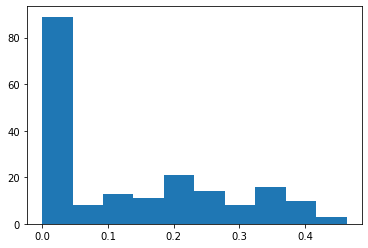

In [55]:
fig0, ax0 = plt.subplots()
ax0.hist(sents_df['pos'])
plt.show()

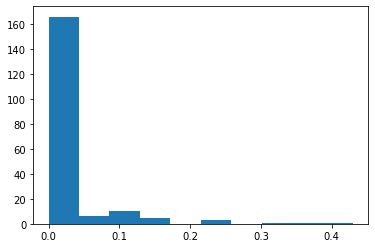

In [56]:
fig1, ax1 = plt.subplots()
ax1.hist(sents_df['neg'])
plt.show()

## Ted Lasso complete histogram

Here I visualized each sentiment into its own histogram. Here you can see there are few negative tweets but looks like there are more positive tweets than negative.

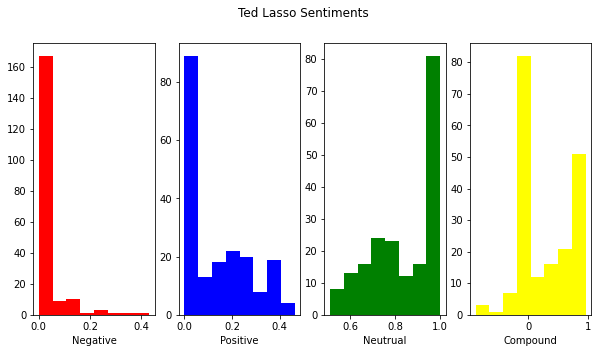

In [57]:
fig4, ax4 = plt.subplots(1, 4, figsize = (10, 5))
ax4[0].hist(sents_df['neg'], bins =  8, color = 'red')
ax4[1].hist(sents_df['pos'], bins =  8, color = 'blue')
ax4[2].hist(sents_df['neu'], bins =  8, color = 'green')
ax4[3].hist(sents_df['compound'], bins =  8, color = 'yellow')

ax4[0].set_xlabel("Negative")
ax4[1].set_xlabel("Positive")
ax4[2].set_xlabel("Neutrual")
ax4[3].set_xlabel("Compound")

fig4.suptitle("Ted Lasso Sentiments")
plt.show()

In [58]:
endpoint_url2 = 'https://api.twitter.com/2/tweets/search/recent'

In [59]:
query2 = urllib.parse.quote('(#blackish OR blackish lang:en)')

In [60]:
query2

'%28%23blackish%20OR%20blackish%20lang%3Aen%29'

In [61]:
my_api_url3 = endpoint_url2 + '?query={}'.format(query2)

In [62]:
my_api_url3

'https://api.twitter.com/2/tweets/search/recent?query=%28%23blackish%20OR%20blackish%20lang%3Aen%29'

In [63]:
tweet_fields2 = 'public_metrics,created_at,author_id,lang'

In [64]:
my_api_url2 = endpoint_url2 + '?query={}&tweet.fields={}'.format(query2, tweet_fields2)

In [65]:
my_api_url2

'https://api.twitter.com/2/tweets/search/recent?query=%28%23blackish%20OR%20blackish%20lang%3Aen%29&tweet.fields=public_metrics,created_at,author_id,lang'

In [66]:
expansions2 = 'author_id'

In [67]:
url2 = endpoint_url2 + '?query={}&max_results=10&tweet.fields{}'.format(query2, tweet_fields2)

In [68]:
response2 = requests.request("GET", url, headers = header)

In [69]:
url_expansions2 = endpoint_url2 + '?query={}&max_results=100&tweet.fields={}&expansions={}&user.fields={}'.format(query2, tweet_fields2, expansions2, 'username')

In [70]:
url_expansions2

'https://api.twitter.com/2/tweets/search/recent?query=%28%23blackish%20OR%20blackish%20lang%3Aen%29&max_results=100&tweet.fields=public_metrics,created_at,author_id,lang&expansions=author_id&user.fields=username'

In [71]:
blackish_response = requests.request("GET", url_expansions2, headers = header)

In [ ]:
blackish_response.text

In [73]:
blackish_dict = json.loads(blackish_response.text)

In [74]:
blackish_dict.keys()

dict_keys(['data', 'includes', 'meta'])

In [75]:
blackish_df = pd.DataFrame(blackish_dict['data'])

In [76]:
blackish_df

,id,public_metrics,text,created_at,author_id,lang
0,1470539115921870855,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",blackish-grey ossel hitch,2021-12-13T23:40:21.000Z,796444880675438592,en
1,1470539014117765122,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",RT @IamW4TC: Congratulations @IssaRae and @Tra...,2021-12-13T23:39:56.000Z,957821109444972545,en
2,1470527694148452358,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",And I really feel like they nominate Blackish ...,2021-12-13T22:54:58.000Z,26905493,en
3,1470527263489802240,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",@Chemicalboyy Banshee\nVikings\nElites\nBlacki...,2021-12-13T22:53:15.000Z,1080035996027273217,en
4,1470520951964065796,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",3) Mejor actor principal en comedia #GlobosDeO...,2021-12-13T22:28:10.000Z,1863836348,es
...,...,...,...,...,...,...
95,1470204422399610884,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Blackish be so inspiring like I wanna be succe...,2021-12-13T01:30:24.000Z,2398245080,en
96,1470203673200537601,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",RT @johnrfisher1: Been kinda snowbound of late...,2021-12-13T01:27:25.000Z,1463583253714059269,en
97,1470202539828289537,"{'retweet_count': 3, 'reply_count': 0, 'like_c...",RT @ChastyRaunchSub: A third item from the AC ...,2021-12-13T01:22:55.000Z,1328506635397046273,en
98,1470193554962145282,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","The tv show Blackish is racist, unless there i...",2021-12-13T00:47:13.000Z,1319384189968461826,en


In [77]:
blackish_dict['meta']

{'newest_id': '1470539115921870855',
 'oldest_id': '1470192856186990595',
 'result_count': 100,
 'next_token': 'b26v89c19zqg8o3fpe15c4662ywe1xnmve7tuh31tur25'}

In [78]:
my_api_url4 = my_api_url2 + '&next_token={}&max_results=100'.format(blackish_dict['meta']['next_token'])

In [79]:
my_api_url4

'https://api.twitter.com/2/tweets/search/recent?query=%28%23blackish%20OR%20blackish%20lang%3Aen%29&tweet.fields=public_metrics,created_at,author_id,lang&next_token=b26v89c19zqg8o3fpe15c4662ywe1xnmve7tuh31tur25&max_results=100'

In [80]:
blackish2_response = requests.request("GET", my_api_url4, headers = header)

In [ ]:
blackish2_response.text

In [82]:
blackish_df = blackish_df.append(pd.DataFrame(json.loads(blackish2_response.text)['data']), ignore_index= True)

In [83]:
blackish_df

,id,public_metrics,text,created_at,author_id,lang
0,1470539115921870855,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",blackish-grey ossel hitch,2021-12-13T23:40:21.000Z,796444880675438592,en
1,1470539014117765122,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",RT @IamW4TC: Congratulations @IssaRae and @Tra...,2021-12-13T23:39:56.000Z,957821109444972545,en
2,1470527694148452358,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",And I really feel like they nominate Blackish ...,2021-12-13T22:54:58.000Z,26905493,en
3,1470527263489802240,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",@Chemicalboyy Banshee\nVikings\nElites\nBlacki...,2021-12-13T22:53:15.000Z,1080035996027273217,en
4,1470520951964065796,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",3) Mejor actor principal en comedia #GlobosDeO...,2021-12-13T22:28:10.000Z,1863836348,es
...,...,...,...,...,...,...
195,1469655354086760451,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",That girl from Blackish... https://t.co/JNoPuq...,2021-12-11T13:08:35.000Z,984971006245769216,en
196,1469651840207884288,"{'retweet_count': 15, 'reply_count': 0, 'like_...",RT @_myvpl_: @NCares17 @jessicawhitIly Yh it w...,2021-12-11T12:54:38.000Z,387132443,en
197,1469648138906763267,"{'retweet_count': 15, 'reply_count': 0, 'like_...",RT @_myvpl_: @NCares17 @jessicawhitIly Yh it w...,2021-12-11T12:39:55.000Z,452280828,en
198,1469624514417991681,"{'retweet_count': 195, 'reply_count': 0, 'like...",RT @VasuBharat09: It's a ray.\nLight and warmt...,2021-12-11T11:06:03.000Z,813312379509506049,en


In [84]:
blackish_df.to_csv('blackishAnalysis.csv')

In [85]:
blackish = pd.read_csv('blackishAnalysis.csv', encoding = 'utf-8')

In [ ]:
blackish.keys()

In [ ]:
blackish['lang'].astype('category')

In [88]:
blackish_posts = blackish[(blackish['lang']) == 'en']

In [ ]:
blackish_posts['lang'].astype('category')

In [90]:
blackish_posts['text']

0                              blackish-grey ossel hitch
1      RT @IamW4TC: Congratulations @IssaRae and @Tra...
2      And I really feel like they nominate Blackish ...
3      @Chemicalboyy Banshee\nVikings\nElites\nBlacki...
5      2) Mejor actriz principal en comedia #GlobosDe...
                             ...                        
194           RT @hetros2022: That girl from Blackish...
195    That girl from Blackish... https://t.co/JNoPuq...
196    RT @_myvpl_: @NCares17 @jessicawhitIly Yh it w...
197    RT @_myvpl_: @NCares17 @jessicawhitIly Yh it w...
198    RT @VasuBharat09: It's a ray.\nLight and warmt...
Name: text, Length: 193, dtype: object

In [ ]:
blackish_posts['text'].iloc[0]

In [92]:
blackish_lowercase = [x.lower() for x in blackish_posts['text']]

In [ ]:
blackish_lowercase[0]

In [94]:
blackish_analyze= SentimentIntensityAnalyzer()

In [95]:
print(blackish_analyze.polarity_scores(blackish_posts['text'].iloc[0]))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [96]:
blackish_senti = blackish_analyze.polarity_scores(blackish_posts['text'].iloc[0])

In [97]:
blackish_senti['neg']

0.0

In [98]:
all_bsenti = [blackish_analyze.polarity_scores(x) for x in blackish_posts['text']]

In [99]:
all_bsenti

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.8442},
 {'neg': 0.207, 'neu': 0.692, 'pos': 0.101, 'compound': -0.4441},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.102, 'neu': 0.8, 'pos': 0.098, 'compound': -0.0258},
 {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404},
 {'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.7506},
 {'neg': 0.0, 'neu': 0.344, 'pos': 0.656, 'compound': 0.9855},
 {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.8016},
 {'neg': 0.099, 'neu': 0.734, 'pos': 0.166, 'compound': 0.3155},
 {'neg': 0.281, 'neu': 0.514, 'pos': 0.206, 'compound': -0.7136},
 {'neg': 0.153, 'neu': 0.625, 'pos': 0.222, 'compound': 0.25},
 {'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compound': -0.3736},
 {'neg': 0.096, 'neu': 0.814, 'pos': 0.09, 'compound': -0.0931},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.216, 'neu': 0.607, 'pos': 0.177, 'compound': -0.0711},
 {

In [100]:
blacksents_df = pd.DataFrame(all_bsenti)

## black-ish histogram

Here I created a dataframe for the blackish sentiment scores. This allows me to better analyze the data and to visualize it. I then made a histogram with the positive sentiments and it visualizes it for me/

In [101]:
blacksents_df

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.690,0.310,0.8442
2,0.207,0.692,0.101,-0.4441
3,0.000,1.000,0.000,0.0000
4,0.102,0.800,0.098,-0.0258
...,...,...,...,...
188,0.000,1.000,0.000,0.0000
189,0.000,1.000,0.000,0.0000
190,0.000,0.798,0.202,0.6486
191,0.000,0.798,0.202,0.6486


In [102]:
blacksents_df['pos'].describe()

count    193.000000
mean       0.127321
std        0.160015
min        0.000000
25%        0.000000
50%        0.076000
75%        0.202000
max        0.656000
Name: pos, dtype: float64

In [103]:
blacksents_df['neg'].describe()

count    193.00000
mean       0.06943
std        0.10193
min        0.00000
25%        0.00000
50%        0.00000
75%        0.13600
max        0.44500
Name: neg, dtype: float64

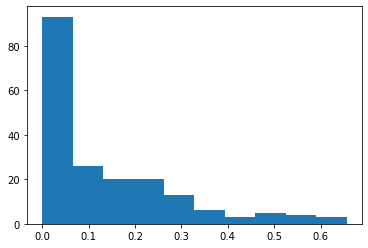

In [104]:
fig2, ax2 = plt.subplots()
ax2.hist(blacksents_df['pos'])
plt.show()

## black-ish complete histogram

Here I have the blackish histograms with each sentiment in a histogram. Interpreting this data I can look at it and say that overall the tweets seem to be neutral. Next I will compare the two shows by each sentiment.

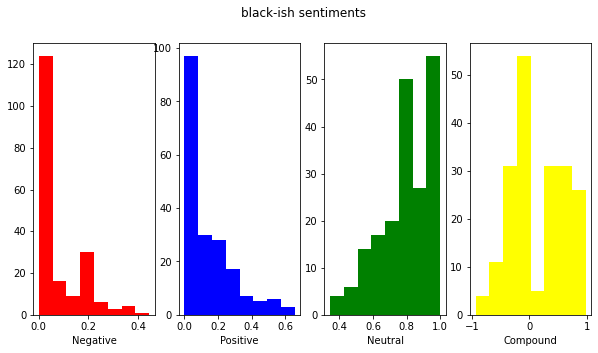

In [119]:
fig3, ax3 = plt.subplots(1, 4, figsize = (10,5))
ax3[0].hist(blacksents_df['neg'], bins =  8, color = 'red')
ax3[1].hist(blacksents_df['pos'], bins = 8, color = 'blue')
ax3[2].hist(blacksents_df['neu'], bins = 8, color = 'green')
ax3[3].hist(blacksents_df['compound'], bins = 8, color = 'yellow')

ax3[0].set_xlabel('Negative')
ax3[1].set_xlabel('Positive')
ax3[2].set_xlabel('Neutral')
ax3[3].set_xlabel('Compound')

fig3.suptitle("black-ish sentiments")
plt.show()

# Comparing Ted Lasso tweets vs. black-ish tweets

Here I combined the two shows sentiment scores which allow me to look at each shows sentiment scores next to each other. The first histogram I am just putting the sentiment scores next to each other. 

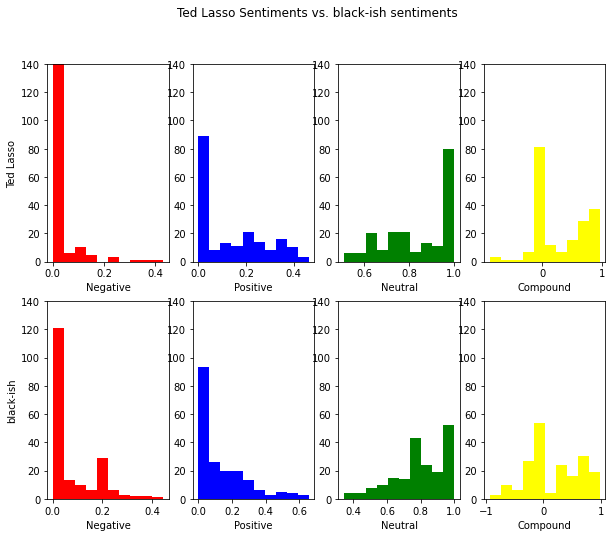

In [120]:
fig5, ax5 = plt.subplots(2, 4, figsize = (10, 8))
ax5[0,0].hist(sents_df['neg'], bins =  10, color = 'red')
ax5[0,1].hist(sents_df['pos'], bins =  10, color = 'blue')
ax5[0,2].hist(sents_df['neu'], bins =  10, color = 'green')
ax5[0,3].hist(sents_df['compound'], bins =  10, color = 'yellow')

ax5[0,0].set_xlabel("Negative")
ax5[0,1].set_xlabel("Positive")
ax5[0,2].set_xlabel("Neutral")
ax5[0,3].set_xlabel("Compound")
ax5[0,0].set_ylabel("Ted Lasso")
ax5[0,0].set_ylim(0,140)
ax5[0,1].set_ylim(0,140)
ax5[0,2].set_ylim(0,140)
ax5[0,3].set_ylim(0,140)

ax5[1,0].hist(blacksents_df['neg'], bins =  10, color = 'red')
ax5[1,1].hist(blacksents_df['pos'], bins = 10, color = 'blue')
ax5[1,2].hist(blacksents_df['neu'], bins = 10, color = 'green')
ax5[1,3].hist(blacksents_df['compound'], bins = 10, color = 'yellow')

ax5[1,0].set_xlabel('Negative')
ax5[1,1].set_xlabel('Positive')
ax5[1,2].set_xlabel('Neutral')
ax5[1,3].set_xlabel('Compound')
ax5[1,0].set_ylabel("black-ish")
ax5[1,0].set_ylim(0,140)
ax5[1,1].set_ylim(0,140)
ax5[1,2].set_ylim(0,140)
ax5[1,3].set_ylim(0,140)

fig5.suptitle("Ted Lasso Sentiments vs. black-ish sentiments")
plt.show()

As for these histograms I overlapped the two shows data in order to get a more clear comparison of them. This is a better visualization because it can support my hypothesis. Ted Lasso is red and blackish is blue.

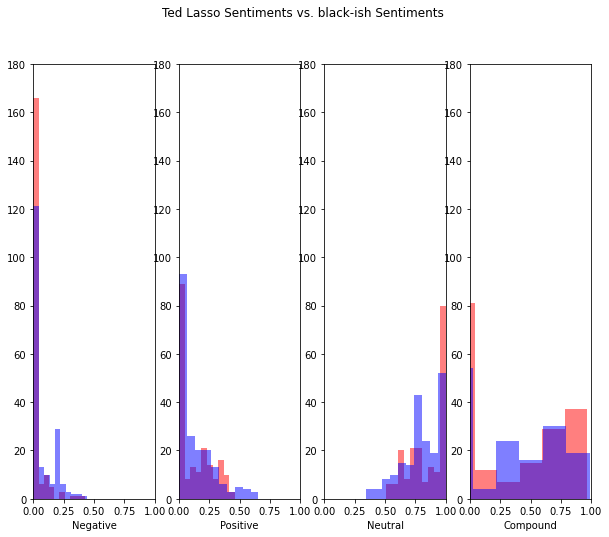

In [121]:
fig6, ax6 = plt.subplots(1, 4, figsize = (10, 8))
ax6[0].hist(sents_df['neg'], bins =  10, color = 'red', alpha = .5)
ax6[0].hist(blacksents_df['neg'], bins =  10, color = 'blue', alpha = .5)

ax6[1].hist(sents_df['pos'], bins =  10, color = 'red', alpha = .5)
ax6[1].hist(blacksents_df['pos'], bins =  10, color = 'blue', alpha = .5)

ax6[2].hist(sents_df['neu'], bins =  10, color = 'red', alpha = .5)
ax6[2].hist(blacksents_df['neu'], bins =  10, color = 'blue', alpha = .5)

ax6[3].hist(sents_df['compound'], bins =  10, color = 'red', alpha = .5)
ax6[3].hist(blacksents_df['compound'], bins =  10, color = 'blue', alpha = .5)

ax6[0].set_ylim(0,180)
ax6[1].set_ylim(0,180)
ax6[2].set_ylim(0,180)
ax6[3].set_ylim(0,180)

ax6[0].set_xlim(0,1)
ax6[1].set_xlim(0,1)
ax6[2].set_xlim(0,1)
ax6[3].set_xlim(0,1)

ax6[0].set_xlabel("Negative")
ax6[1].set_xlabel("Positive")
ax6[2].set_xlabel("Neutral")
ax6[3].set_xlabel("Compound")

fig6.suptitle("Ted Lasso Sentiments vs. black-ish Sentiments")
plt.show()

## Conclusion

Overall, I believe that my hypothesis was right to some extent. Looking at the compound graph Ted Lasso seems to have a higher positive score than blackish. Even if you look at the graph above that one, you can see that Ted Lasso is more positive than negative. This has some limitations to it because I am just guessing by looking at the graphs, that Ted Lasso is more positive. If someone else were to look at the graphs they might say that blackish is more positive. Right now it is pretty bias to say that Ted Lasso is more positive. Another limitation I ran into was that I only have 200 Tweets for each show, I think collecting more Tweets would've help for my hypothesis. In the future I hope to get approved for the academic account for the Twitter API so that I can get Tweets from before the Emmy winners were announced.